board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '-1', '220', '250', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '70', '30', '-1', '-1', '170', '110', '-1', '-1']
i:  2 vals:  ['-1', '15000', '-2', '-2', '-1', '-1', '-1', '-1', '220', '220', '-1', '6000', '-2', '-2', '170', '10000', '-2', '-2', '170', '30']
i:  3 vals:  ['-1', '14000', '-2', '-2', '-1', '-1', '-1', '17000', '-2', '-2', '-1', '11300', '-2', '-2', '-2', '21060', '-2', '-2', '-2', '-2']
i:  4 vals:  ['-1', '7000', '-2', '-2', '170', '-1', '-1', '15230', '-2', '-2', '7040', '-2', '-2', '11000', '-2', '-2', '15170', '-2', '-2', '-2']
i:  5 vals:  ['-1', '-1', '17060', '-2', '-2', '70', '29000', '-2', '-2', '-2', '-2', '-2', '-1', '70', '14170', '-2', '-2', '-2', '130', '30']
i:  6 vals:  ['-1', '14170', '-2', '-2', '-2', '-2', '10170', '-2', '-2', '9000', '-2', '-2', '20110', '-2', '-2', '-2', '-2', '3000', '-2', '-2']
i:  7 vals:  ['12000', '-2', '-2', '410', 

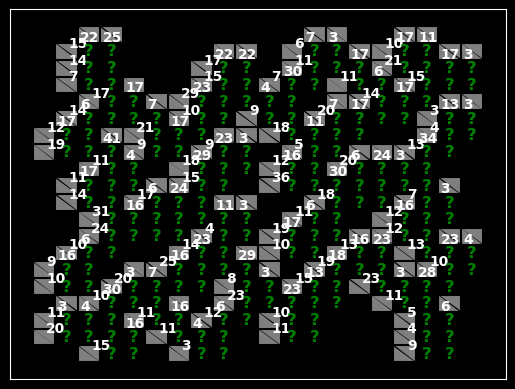

board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '170', '160', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '30', '160', '-1', '-1', '-1', '-1', '410', '40', '160', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '340', '40', '30', '240', '-1', '160', '30', '-1']
i:  2 vals:  ['17000', '-2', '-2', '150', '60', '-1', '-1', '-1', '40', '9170', '-2', '-2', '30', '-1', '-1', '12030', '-2', '-2', '-2', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '16160', '-2', '-2', '-2', '-2', '8130', '-2', '-2', '-1']
i:  3 vals:  ['23000', '-2', '-2', '-2', '-2', '170', '-1', '23000', '-2', '-2', '-2', '-2', '-2', '40', '19000', '-2', '-2', '-2', '-2', '-1', '-1', '-1', '-1', '70', '210', '-1', '-1', '-1', '40', '220', '40000', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-1']
i:  4 vals:  ['-1', '-1', '14160', '-2', '-2', '-2', '40', '10000', '-2', '-2', '-1', '4000', '-2', '-2', '6160'

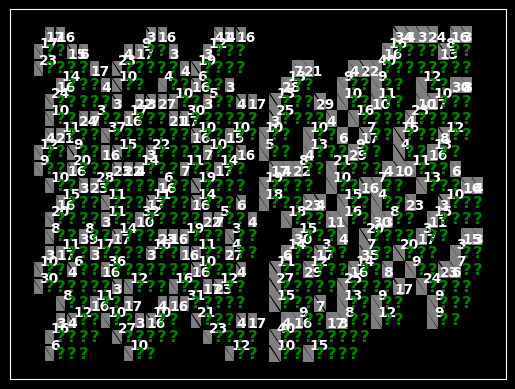

board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '-1', '-1', '160', '30', '-1', '-1', '100', '160', '30', '-1', '240', '40', '-1', '-1', '-1', '-1', '-1', '-1', '160', '40', '160', '-1', '-1', '40', '160', '-1', '210', '30', '-1']
i:  2 vals:  ['-1', '30', '11240', '-2', '-2', '40', '10000', '-2', '-2', '-2', '9030', '-2', '-2', '-1', '-1', '-1', '-1', '-1', '10160', '-2', '-2', '-2', '-1', '8000', '-2', '-2', '4220', '-2', '-2', '-1']
i:  3 vals:  ['21000', '-2', '-2', '-2', '-2', '-2', '26160', '-2', '-2', '-2', '-2', '-2', '-2', '80', '160', '-1', '-1', '25000', '-2', '-2', '-2', '-2', '-1', '22000', '-2', '-2', '-2', '-2', '-2', '-1']
i:  4 vals:  ['8000', '-2', '-2', '200', '10000', '-2', '-2', '-2', '30', '10000', '-2', '-2', '8000', '-2', '-2', '160', '-1', '12000', '-2', '-2', '170', '40', '-1', '60', '170', '14000', '-2', '-2', '100', '-1']
i:  5 vals:  ['-1', '12000', '-2', '-2

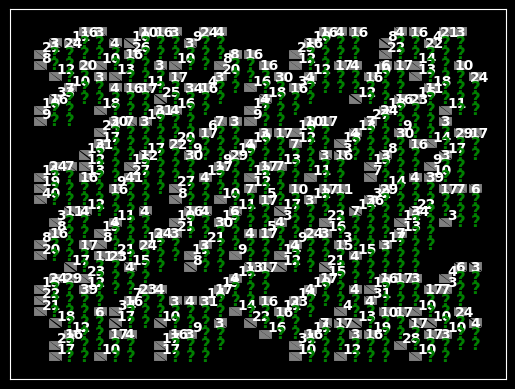

board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '170', '30', '390', '-1', '-1', '40', '160', '30', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '70', '300', '-1', '-1', '-1', '170', '70', '-1', '-1', '60', '170', '-1', '-1', '-1', '-1', '-1', '30', '40', '-1', '60', '160', '-1', '-1', '-1', '-1', '-1', '170', '160', '-1', '-1', '-1', '160', '30', '-1', '-1', '240', '30', '-1', '-1', '-1', '-1']
i:  2 vals:  ['18000', '-2', '-2', '-2', '-1', '12000', '-2', '-2', '-2', '300', '-1', '-1', '-1', '30', '160', '-1', '-1', '-1', '11160', '-2', '-2', '-1', '-1', '12210', '-2', '-2', '-1', '9060', '-2', '-2', '-1', '-1', '-1', '-1', '4170', '-2', '-2', '11110', '-2', '-2', '-1', '-1', '-1', '390', '17060', '-2', '-2', '40', '-1', '9060', '-2', '-2', '-1', '11000', '-2', '-2', '30', '170', '240', '70']
i:  3 vals:  ['14000', '-2', '-2', '-2', '30', '19060', '-2', '-2', '-2', '-2', 

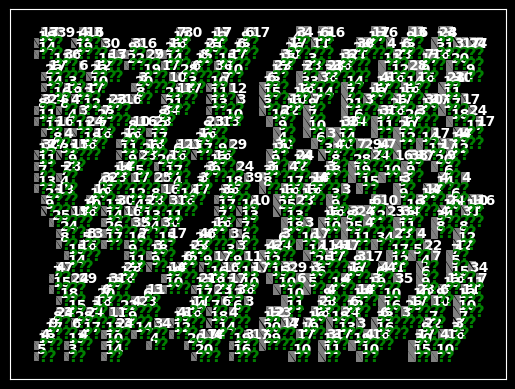

board:  [[], [], []]
i:  1 vals:  ['-1', '70', '60']
i:  2 vals:  ['9000', '-2', '-2']
i:  3 vals:  ['4000', '-2', '-2']


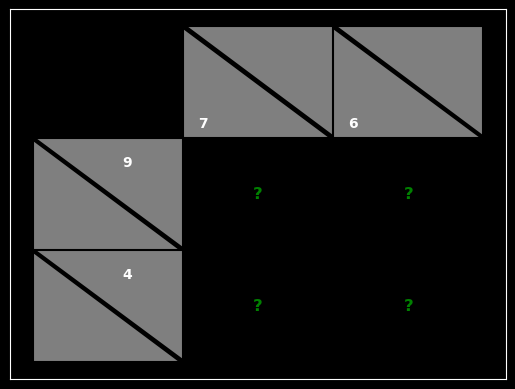

board:  [[], [], []]
i:  1 vals:  ['-1', '120', '90']
i:  2 vals:  ['16000', '-2', '-2']
i:  3 vals:  ['5000', '-2', '-2']


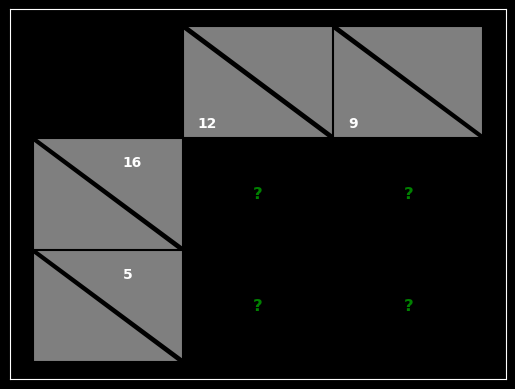

board:  [[], [], []]
i:  1 vals:  ['-1', '130', '60']
i:  2 vals:  ['14000', '-2', '-2']
i:  3 vals:  ['5000', '-2', '-2']


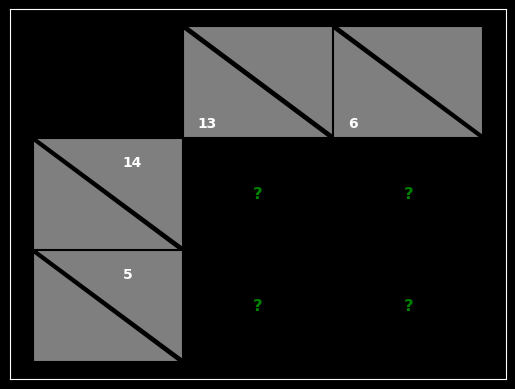

board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '80', '170', '160', '-1', '-1', '60', '160', '-1', '160', '30', '-1', '-1', '-1', '-1', '-1', '-1', '240', '160', '-1', '-1', '-1', '-1', '-1', '300', '170', '30', '-1', '-1', '-1', '-1']
i:  2 vals:  ['-1', '-1', '-1', '-1', '280', '30', '180', '-1', '-1', '17000', '-2', '-2', '-2', '-1', '10000', '-2', '-2', '6000', '-2', '-2', '-1', '170', '300', '-1', '-1', '16070', '-2', '-2', '30', '-1', '-1', '40', '15070', '-2', '-2', '-2', '170', '-1', '-1', '-1']
i:  3 vals:  ['-1', '-1', '-1', '14070', '-2', '-2', '-2', '-1', '-1', '22170', '-2', '-2', '-2', '-1', '11160', '-2', '-2', '3070', '-2', '-2', '17000', '-2', '-2', '-1', '20170', '-2', '-2', '-2', '-2', '160', '31000', '-2', '-2', '-2', '-2', '-2', '-2', '70', '160', '40']
i:  4 vals:  ['-1', 

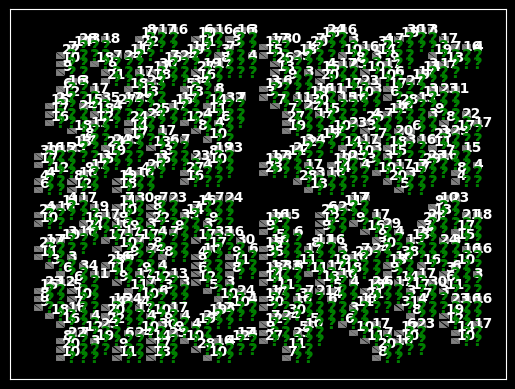

board:  [[], [], [], []]
i:  1 vals:  ['-1', '120', '130', '70']
i:  2 vals:  ['7000', '-2', '-2', '-2']
i:  3 vals:  ['13000', '-2', '-2', '-2']
i:  4 vals:  ['12000', '-2', '-2', '-2']


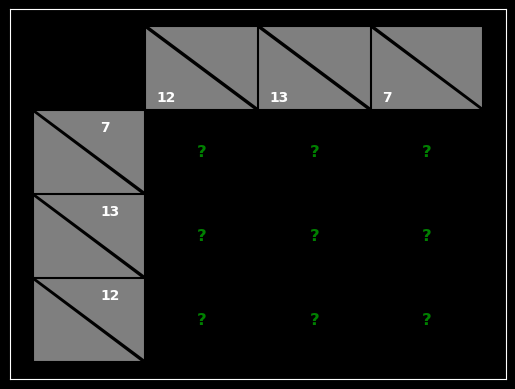

board:  [[], [], [], []]
i:  1 vals:  ['-1', '240', '170', '70']
i:  2 vals:  ['20000', '-2', '-2', '-2']
i:  3 vals:  ['18000', '-2', '-2', '-2']
i:  4 vals:  ['10000', '-2', '-2', '-2']


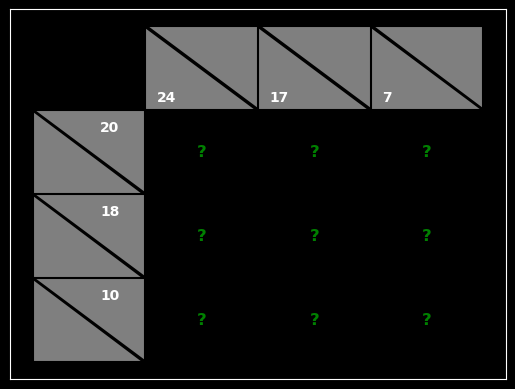

board:  [[], [], [], [], []]
i:  1 vals:  ['-1', '-1', '-1', '60', '160']
i:  2 vals:  ['-1', '150', '3120', '-2', '-2']
i:  3 vals:  ['10000', '-2', '-2', '-2', '-2']
i:  4 vals:  ['17000', '-2', '-2', '-2', '-2']
i:  5 vals:  ['15000', '-2', '-2', '-1', '-1']


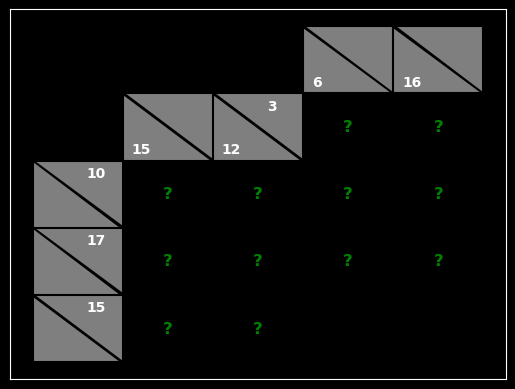

board:  [[], [], [], [], []]
i:  1 vals:  ['-1', '-1', '-1', '70', '230']
i:  2 vals:  ['-1', '230', '10060', '-2', '-2']
i:  3 vals:  ['24000', '-2', '-2', '-2', '-2']
i:  4 vals:  ['17000', '-2', '-2', '-2', '-2']
i:  5 vals:  ['8000', '-2', '-2', '-1', '-1']


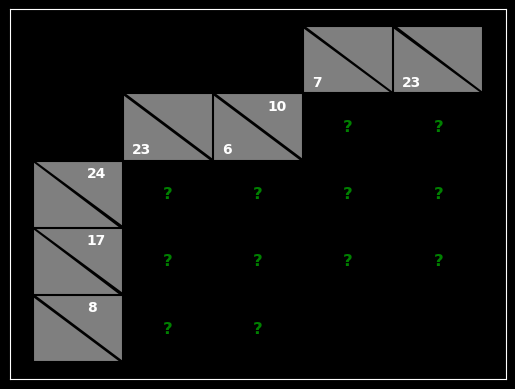

board:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
i:  1 vals:  ['-1', '-1', '-1', '-1', '-1', '-1', '-1', '340', '40', '160', '-1', '300', '60', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '60', '290', '-1', '-1', '-1', '-1', '150', '170', '-1', '210', '170', '-1', '-1', '40', '230', '-1', '-1', '-1', '-1', '-1', '-1', '170', '40', '-1', '-1', '130', '180', '-1', '-1', '-1', '-1', '-1', '40', '30']
i:  2 vals:  ['-1', '-1', '-1', '-1', '30', '170', '16000', '-2', '-2', '-2', '10070', '-2', '-2', '290', '60', '-1', '-1', '-1', '-1', '-1', '-1', '170', '40', '-1', '-1', '10000', '-2', '-2', '-1', '-1', '-1', '11000', '-2', '-2', '9000', '-2', '-2', '40', '10000', '-2', '-2', '-1', '110', '170', '40', '-1', '11150', '-2', '-2', '-1', '7000', '-2', '-2', '40', 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import numpy as np
import sys
import os



b = 0.025

def fill_one_empty(ax, row, col):

    row = row - 1
    col = col - 1
    
    s_c = [col, col+1, col+1, col]
    s_r = [row, row, row+1, row+1]
    
    ax.fill(s_c, s_r, 'k')

    return ax

def fill_one_empty_g(ax, row, col):

    row = row - 1
    col = col - 1
    
    s_c = [col, col+1, col+1, col]
    s_r = [row, row, row+1, row+1]
    
    ax.fill(s_c, s_r, 'g')

    return ax

def fill_one_hint(ax, row, col, hint1, hint2):

    s_hint1 = str(hint1)
    s_hint2 = str(hint2)
    
    ax.fill([col-1+b,col,col], [row-1,row-1,row-b], 'k') 
    ax.fill([col-1,col-1,col-b], [row-1+b,row,row], 'k') 

    
    ax.text(col-1+0.5, row+-1+0.35, s_hint1, color='w', fontsize=10, fontweight='bold')
    ax.text(col-1+0.2, row+-1+0.8, s_hint2, color='w', fontsize=10, fontweight='bold')
    
    return ax

def fill_hints(ax, row, col, hintS):

    hint = hintS[0]
    _type = hintS[1]

    ax.fill([col-1+b,col,col], [row-1,row-1,row-b], 'tab:grey')
    ax.fill([col-1,col-1,col-b], [row-1+b,row,row], 'tab:grey')

    if(_type == "down"):
        ax.text(col-1+0.1, row+-1+0.9, hint[0], color='w', fontsize=10, fontweight='bold')
    if(_type == "right"):
        ax.text(col-1+0.6, row+-1+0.25, hint[0], color='w', fontsize=10, fontweight='bold')
    if(_type == "combined"):
        ax.text(col-1+0.1, row+-1+0.9, hint[0], color='w', fontsize=10, fontweight='bold')
        ax.text(col-1+0.6, row+-1+0.25, hint[1], color='w', fontsize=10, fontweight='bold')
        
def write_value(ax, row, col, val):

    row = row - 1
    col = col -1

    ax.text(col + 0.5, row + 0.5, val, color='k', fontsize=12, fontweight='bold', ha='center', va='center')
    
    
    return ax

def write_mark(ax, row, col):

    row = row - 1
    col = col -1

    ax.text(col + 0.5, row + 0.5, "?", color='g', fontsize=12, fontweight='bold', ha='center', va='center')


def write_value_s(ax, row, col, val):

    row = row - 1
    col = col -1

    ax.text(col + 0.5, row + 0.5, val, color='k', fontsize=9, fontweight='bold', ha='center', va='center')
    

    return ax

def create_matrix(n):

    fig, ax = plt.subplots()
    ax.invert_yaxis()
    

    for i in range(n+1):
        ax.plot([0,n], [i,i], 'k-')
        ax.plot([i,i], [0,n], 'k-')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
    return fig, ax

def assess_hint(hint):

    hint = hint / 10
    
    if(hint % 100 == 0):
        return [[int(hint/100)], "right"]
        
    else:
        div = int(hint / 100)
        rem = int(hint % 100)

        if(div == 0 and rem != 0):
            return [[rem], "down"]
        if(div != 0 and rem != 0):
            return [[rem, div], "combined"] ##[0] down [1] right


def read_file(_file):

    reader = open(_file, "r")
    readlines = reader.readlines()

    m, n = readlines[0].strip("\n").split(" ")
    
    m = int(m)
    n = int(n)
    
    board = [[] for i in range(m)]
    print("board: ", board)
    for i in range(1, len(readlines)):
        vals = readlines[i].strip("\n").split(" ")
        vals = [x for x in vals if x != ""]
        print("i: ", i , "vals: ", vals)
        for val in vals:
            board[i-1].append(int(val))

    return board, m, n
        
class Kakuro:
    
    def __init__(self, _file):

        self. board, self.m, self.n = read_file(_file)
        self.fig, self.ax = create_matrix(self.m)
        self.size = self.m
        
    def print_matrix(self):
        plt.show()


    def generate_board(self):
        
        boardSol = self.board
        
        i = 0
        for row in boardSol:
            j = 0
            for item in row:
                
                if(item == -1):
                    fill_one_empty(self.ax, i+1, j+1)
                elif(item > 0 and item <= 9):
                    write_value(self.ax, i+1, j+1, item)
                elif(item == -2):
                    write_mark(self.ax, i+1, j+1)
                else:
                    fill_hints(self.ax, i+1, j+1, assess_hint(item))
                j = j + 1
            i = i + 1
        plt.show()
    
if __name__ == "__main__":
    # get all the files which end with .kakuro
    files= [f for f in os.listdir('.') if os.path.isfile(f)]
    files = [f for f in files if f.endswith(".kakuro")]
    for file in files:
        k = Kakuro(file)
        k.generate_board()
    


# 35150853micro seconds  for board4_1.kakuro
# 4081micro for 3_1
# 3217micro with sort with length based sorting 
# 1127micro with hint base sorting 

#  1084429170micro seconds 5_1 18 minutes 
#  2293952330micro seconds 5_2 38.23 minutes